## Imported Required Libaries

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.subplots as sp
from geopy.geocoders import Nominatim
import pgeocode
import plotly.figure_factory as ff

In [219]:
sns.set_context("notebook")


In [220]:
sns.set_style("dark")

## Import Data

In [221]:
data = pd.read_csv("2022-23_data_sa_crime.csv")

In [222]:
data.tail()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count
97073,30/06/2023,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1
97074,30/06/2023,WOODVILLE SOUTH,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1
97075,30/06/2023,WYNN VALE,5127,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1
97076,30/06/2023,NaN,NaN,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from shop,1
97077,30/06/2023,NaN,NaN,OFFENCES AGAINST THE PERSON,OTHER OFFENCES AGAINST THE PERSON,"Abduction, harassment and other offences",1


In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97078 entries, 0 to 97077
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Reported Date                97078 non-null  object
 1   Suburb - Incident            96475 non-null  object
 2   Postcode - Incident          96368 non-null  object
 3   Offence Level 1 Description  97078 non-null  object
 4   Offence Level 2 Description  97078 non-null  object
 5   Offence Level 3 Description  97078 non-null  object
 6   Offence count                97078 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 5.2+ MB


## Preprocess Data

In [224]:
# converting 'Reported Date' column to date time
data['Reported Date'] = pd.to_datetime(data['Reported Date'] , format="%d/%m/%Y")
data['Reported Date'].head()

0   2022-07-01
1   2022-07-01
2   2022-07-01
3   2022-07-01
4   2022-07-01
Name: Reported Date, dtype: datetime64[ns]

In [225]:

a =data["Reported Date"].dt.month
b = data["Reported Date"].dt.year

data["month"] = pd.Series([f"{a}/{b}" for a,b in zip(a,b)])

In [226]:
data["month"] = pd.to_datetime(data['month'] , format="%m/%Y")
data.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,month
0,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,"Other fraud, deception and related offences",1,2022-07-01
1,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Graffiti,1,2022-07-01
2,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2,2022-07-01
3,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,Other unlawful entry with intent,1,2022-07-01
4,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,2,2022-07-01


- we are creating "month" column so thata we get make better trend analysis in future.

In [227]:
# analyse roes with missing values

data.dropna(inplace = True)

- in above we are dropping rows from dataset only because amount of total rows is about 0.5% of total data.

In [228]:
data.reset_index(inplace=True)

In [229]:
data.tail()

,index,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,month
96360,97071,2023-06-30,WINDSOR GARDENS,5087,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1,2023-06-01
96361,97072,2023-06-30,WOODVILLE NORTH,5012,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1,2023-06-01
96362,97073,2023-06-30,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1,2023-06-01
96363,97074,2023-06-30,WOODVILLE SOUTH,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1,2023-06-01
96364,97075,2023-06-30,WYNN VALE,5127,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1,2023-06-01


## Cleaning Data

In [230]:
data.drop(columns=["index"] , inplace = True)


In [231]:
data.tail()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,month
96360,2023-06-30,WINDSOR GARDENS,5087,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault not resulting in injury,1,2023-06-01
96361,2023-06-30,WOODVILLE NORTH,5012,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Theft from motor vehicle,1,2023-06-01
96362,2023-06-30,WOODVILLE SOUTH,5011,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,1,2023-06-01
96363,2023-06-30,WOODVILLE SOUTH,5011,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Common Assault,1,2023-06-01
96364,2023-06-30,WYNN VALE,5127,OFFENCES AGAINST THE PERSON,ACTS INTENDED TO CAUSE INJURY,Serious Assault resulting in injury,1,2023-06-01


In [232]:
missing_val_columns =list()
for col in data.columns:
    print(col , "has total Missing value : " ,data[col].isna().sum())
    if data[col].isna().sum() >0:
        missing_val_columns.append(col)
missing_val_columns

Reported Date has total Missing value :  0
Suburb - Incident has total Missing value :  0
Postcode - Incident has total Missing value :  0
Offence Level 1 Description has total Missing value :  0
Offence Level 2 Description has total Missing value :  0
Offence Level 3 Description has total Missing value :  0
Offence count has total Missing value :  0
month has total Missing value :  0


[]

as we can see from above output, out data is almost clean and data doesn't contain any missing value

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96365 entries, 0 to 96364
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Reported Date                96365 non-null  datetime64[ns]
 1   Suburb - Incident            96365 non-null  object        
 2   Postcode - Incident          96365 non-null  object        
 3   Offence Level 1 Description  96365 non-null  object        
 4   Offence Level 2 Description  96365 non-null  object        
 5   Offence Level 3 Description  96365 non-null  object        
 6   Offence count                96365 non-null  int64         
 7   month                        96365 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 5.9+ MB


In [234]:
data.nunique()

Reported Date                   365
Suburb - Incident              1248
Postcode - Incident             379
Offence Level 1 Description       2
Offence Level 2 Description       9
Offence Level 3 Description      29
Offence count                    23
month                            12
dtype: int64

## Defining and making usefull variables and Filters

- let's check total unique value we have in column ""Offence Level 1 Description""

In [235]:
data["Offence Level 1 Description"].unique()

array(['OFFENCES AGAINST PROPERTY', 'OFFENCES AGAINST THE PERSON'],
      dtype=object)

- create filter that gives "Offence Level 2 Description" that belongs to offence against PROPERTY
- we will also print total number of Offence Level 2 that is against PROPERTY

In [236]:
filter_for_OL1_PROPERTY = data["Offence Level 1 Description"] == 'OFFENCES AGAINST PROPERTY'

OL2_of_OL1_PROPERTY = data.loc[filter_for_OL1_PROPERTY ,"Offence Level 2 Description" ].unique()

print(len(OL2_of_OL1_PROPERTY))
OL2_of_OL1_PROPERTY

4


array(['FRAUD DECEPTION AND RELATED OFFENCES',
       'PROPERTY DAMAGE AND ENVIRONMENTAL', 'SERIOUS CRIMINAL TRESPASS',
       'THEFT AND RELATED OFFENCES'], dtype=object)

- create filter that gives "Offence Level 2 Description" that belongs to offence against PERSON
- we will also print total number of Offence Level 2 that is against PERSON

In [237]:
filter_for_OL1_PERSON =  data["Offence Level 1 Description"] =='OFFENCES AGAINST THE PERSON'
OL2_of_OL1_PERSON = data.loc[filter_for_OL1_PERSON ,"Offence Level 2 Description" ].unique()
print(len(OL2_of_OL1_PERSON))
OL2_of_OL1_PERSON

5


array(['ACTS INTENDED TO CAUSE INJURY',
       'OTHER OFFENCES AGAINST THE PERSON',
       'ROBBERY AND RELATED OFFENCES',
       'SEXUAL ASSAULT AND RELATED OFFENCES',
       'HOMICIDE AND RELATED OFFENCES'], dtype=object)

- create filter that gives "Offence Level 3 Description" that belongs to offence against PROPERY
- we will also print total number of Offence Level 3 that is against PROPERTY

In [238]:

OL3_of_OL1_PROPERTY = data.loc[filter_for_OL1_PROPERTY ,"Offence Level 3 Description" ].unique()
print(len(OL3_of_OL1_PROPERTY))

OL3_of_OL1_PROPERTY

13


array(['Other fraud, deception and related offences', 'Graffiti',
       'Other property damage and environmental',
       'Other unlawful entry with intent', 'Other theft',
       'Theft from shop', 'Theft/Illegal Use of MV',
       'Property damage by fire or explosion', 'Theft from motor vehicle',
       'Obtain benefit by deception', 'SCT - Non Residence',
       'Receive or handle proceeds of crime', 'SCT - Residence'],
      dtype=object)

- create filter that gives "Offence Level 3 Description" that belongs to offence against PERSON
- we will also print total number of Offence Level 3 that is against PERSON

In [239]:

OL3_of_OL1_PERSON = data.loc[filter_for_OL1_PERSON ,"Offence Level 3 Description" ].unique()
print(len(OL3_of_OL1_PERSON))

OL3_of_OL1_PERSON

16


array(['Serious Assault not resulting in injury',
       'Serious Assault resulting in injury', 'Threatening behaviour',
       'Common Assault', 'Aggravated robbery', 'Non-aggravated robbery',
       'Aggravated sexual assault', 'Non-aggravated sexual assault',
       'Other homicide and related offences',
       'Abduction, harassment and other offences',
       'Other acts intended to cause injury', 'Blackmail and extortion',
       'Dangerous or negligent acts', 'Assault police',
       'Non-assaultive sexual offences', 'Murder'], dtype=object)

## Create Colums from Existing Columns to get better insights

In [240]:
data.replace(to_replace='NOT DISCLOSED' , value=0,inplace=True)

- we have postalcode in "Postcode - Incident" column, we will get latitude and longitude of the place using `pgeocode` library

In [241]:
## Convert postcode to lattitude and longitude
postal_codes =data["Postcode - Incident"].values.astype('str').tolist()
nomi = pgeocode.Nominatim('au')
SA= nomi.query_postal_code(postal_codes)
SA


,postal_code,country_code,place_name,state_name,state_code,county_name,county_code,community_name,community_code,latitude,longitude,accuracy
0,5000,AU,"Hutt Street, City West Campus, Halifax Street,...",South Australia,SA,SA CITY SUBS,NaN,NaN,NaN,-34.92855,138.600212,3.0
1,5000,AU,"Hutt Street, City West Campus, Halifax Street,...",South Australia,SA,SA CITY SUBS,NaN,NaN,NaN,-34.92855,138.600212,3.0
2,5000,AU,"Hutt Street, City West Campus, Halifax Street,...",South Australia,SA,SA CITY SUBS,NaN,NaN,NaN,-34.92855,138.600212,3.0
3,5000,AU,"Hutt Street, City West Campus, Halifax Street,...",South Australia,SA,SA CITY SUBS,NaN,NaN,NaN,-34.92855,138.600212,3.0
4,5000,AU,"Hutt Street, City West Campus, Halifax Street,...",South Australia,SA,SA CITY SUBS,NaN,NaN,NaN,-34.92855,138.600212,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
96360,5087,AU,"Windsor Gardens, Klemzig",South Australia,SA,SA SUBS NEAR 2,NaN,NaN,NaN,-34.87155,138.646700,4.0
96361,5012,AU,"Woodville North, Woodville Gardens, Athol Park...",South Australia,SA,SA SUBS NEAR 1,NaN,NaN,NaN,-34.86225,138.547825,4.0
96362,5011,AU,"Woodville, St Clair, Woodville Park, Woodville...",South Australia,SA,SA SUBS NEAR 1,NaN,NaN,NaN,-34.88114,138.536660,4.0
96363,5011,AU,"Woodville, St Clair, Woodville Park, Woodville...",South Australia,SA,SA SUBS NEAR 1,NaN,NaN,NaN,-34.88114,138.536660,4.0


In [242]:
data["Latitude"] = SA["latitude"]
data["Longitude"] = SA["longitude"]

In [243]:
data[data["Latitude"].isna()]["Postcode - Incident"]

149      0
150      0
404      0
405      0
636      0
        ..
96002    0
96003    0
96004    0
96257    0
96258    0
Name: Postcode - Incident, Length: 923, dtype: object

- we will create day from "Reported date" column to see whether we can find some insight using weekday

In [244]:
data["Weekday"] = data["Reported Date"].dt.strftime('%A')

In [245]:
data.head()

,Reported Date,Suburb - Incident,Postcode - Incident,Offence Level 1 Description,Offence Level 2 Description,Offence Level 3 Description,Offence count,month,Latitude,Longitude,Weekday
0,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,FRAUD DECEPTION AND RELATED OFFENCES,"Other fraud, deception and related offences",1,2022-07-01,-34.92855,138.600212,Friday
1,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Graffiti,1,2022-07-01,-34.92855,138.600212,Friday
2,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,PROPERTY DAMAGE AND ENVIRONMENTAL,Other property damage and environmental,2,2022-07-01,-34.92855,138.600212,Friday
3,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,SERIOUS CRIMINAL TRESPASS,Other unlawful entry with intent,1,2022-07-01,-34.92855,138.600212,Friday
4,2022-07-01,ADELAIDE,5000,OFFENCES AGAINST PROPERTY,THEFT AND RELATED OFFENCES,Other theft,2,2022-07-01,-34.92855,138.600212,Friday


- as we created new column "Latitude" and "Longitude" we have to check whether any missing value is present if there is missing value will replace it with some suitable value.

In [246]:
data.isna().sum()

Reported Date                    0
Suburb - Incident                0
Postcode - Incident              0
Offence Level 1 Description      0
Offence Level 2 Description      0
Offence Level 3 Description      0
Offence count                    0
month                            0
Latitude                       923
Longitude                      923
Weekday                          0
dtype: int64

In [247]:
data.fillna(0,inplace=True)

In [92]:
data.nunique()

Reported Date                   365
Suburb - Incident              1248
Postcode - Incident             379
Offence Level 1 Description       2
Offence Level 2 Description       9
Offence Level 3 Description      29
Offence count                    23
month                            12
Latitude                        372
Longitude                       371
Weekday                           7
dtype: int64

# Start Visualization

## Overall Distributions


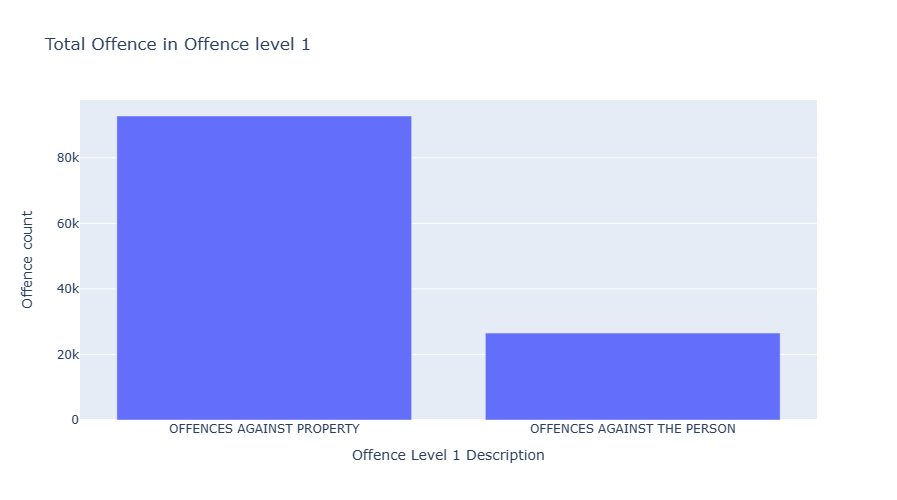

In [204]:
OL1 = data.groupby(by =["Offence Level 1 Description"])[["Offence count"]].sum()

fig = px.bar(OL1,  x= OL1.index  ,y  =OL1["Offence count"] ,title = "Total Offence in Offence level 1",
            width=700,
            height=500)
fig.show()


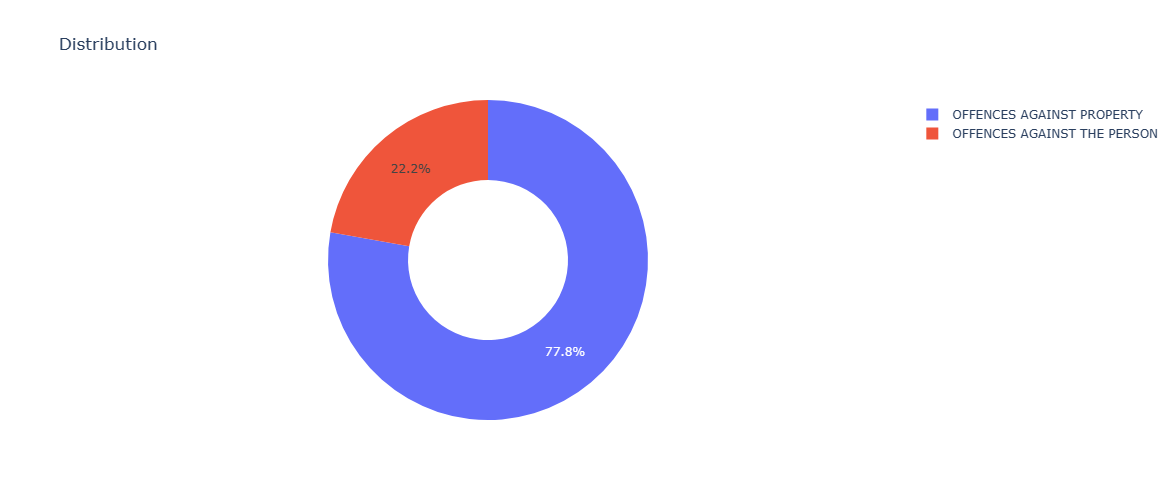

In [266]:

fig = px.pie(OL1, values = OL1["Offence count"],names=OL1.index, title='Distribution',hole = 0.5,width = 900,height=500)
fig.show()

INSIGHT
 - Total **92.75 K** offence are registered against PROPERTY which is about **77.8%** of total Offences registerd.
 - Total **26.51 K** offence are registered against PERSON which is about **22.2%** of total Offences registerd.

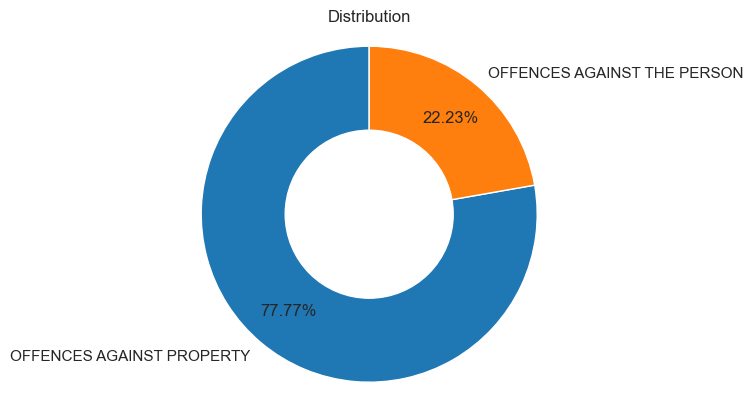

In [97]:

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(x=OL1["Offence count"]  , labels= OL1.index , autopct='%1.2f%%',pctdistance=0.75 ,startangle=90)

# Draw a white circle in the center to create a donut chart
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that the pie is drawn as a circle.
ax.axis('equal')  
plt.title('Distribution')
plt.show()


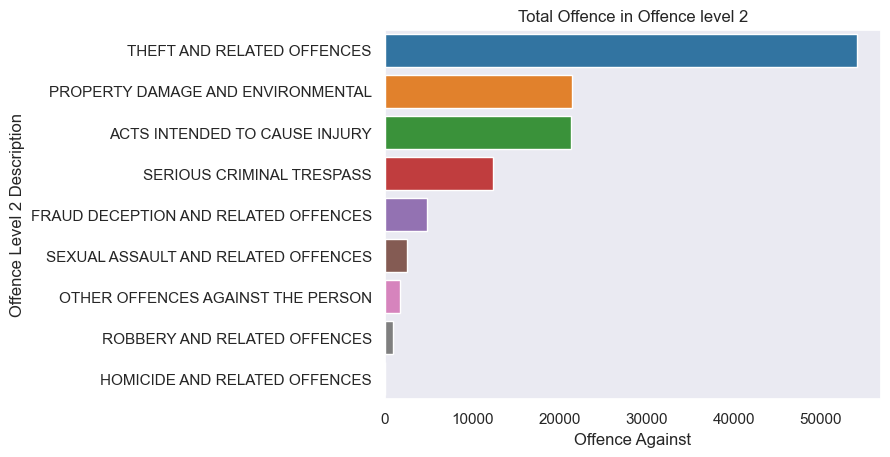

In [98]:
OL2 = data.groupby(by =["Offence Level 2 Description"])[["Offence count"]].sum().sort_values(by="Offence count",ascending=False)

ax = sns.barplot(OL2,  y= OL2.index  ,x  =OL2["Offence count"] , orient="h" )

ax.set(title = "Total Offence in Offence level 2"  , xlabel = "Offence Against" );

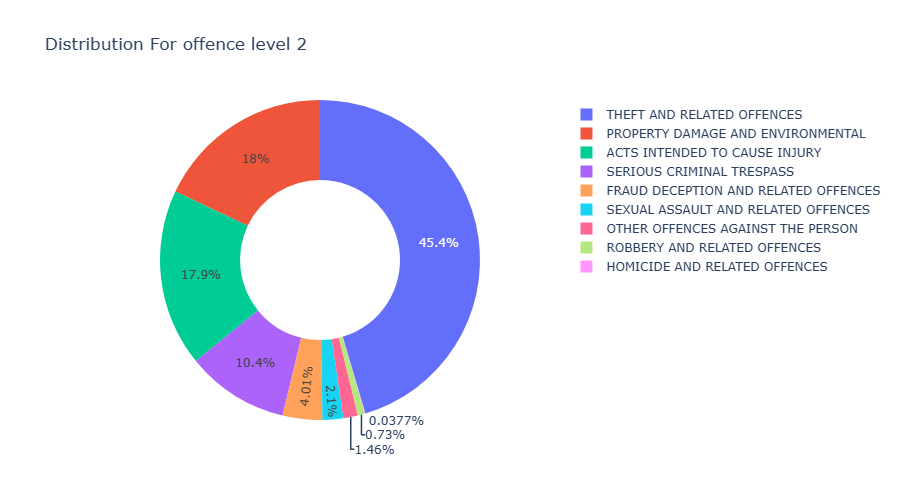

In [208]:

fig = px.pie(OL2, values = OL2["Offence count"],names=OL2.index, title='Distribution For offence level 2',
             hole = 0.5,width = 900 , height=500)
fig.show()

INSIGHTS
- FOUR most common offences are
  1) THEFT AND RELATED OFFENCES (45.4%)
  2) PROPERTY DAMAGE AND ENVIRONMENTAL (18%)
  3) ACTS INTENDED TO CAUSE INJURY (17.9%)
  4) SERIOUS CRIMINAL TRESPASS (10.4%)
- THESE are responsible for more than 90% of total offences recorded.

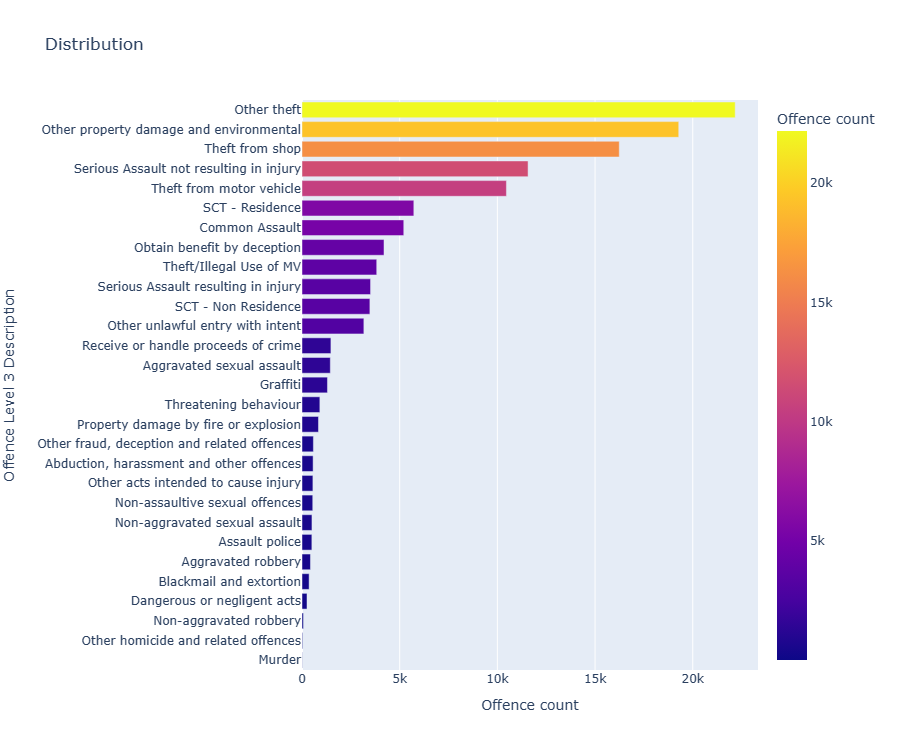

In [100]:
OL3 = data.groupby(by =["Offence Level 3 Description"])[["Offence count"]].sum().sort_values(by="Offence count",ascending=False)

OL3 = OL3.sort_values(by="Offence count")
fig = px.bar(OL3, x = OL3["Offence count"],y=OL3.index, title='Distribution',
             color = OL3["Offence count"],
            width=900,
            height=750)
fig.show()

TOP Specific offences with more than 10000 times recorded within 1 year are
1) 83
Other t  - 22173
2) Other property damage and environmental -	19283
3) Theft from shop	- 16238
4) Serious Assault not resulting in injury	- 11571
5) Theft from motor vehicle	- 10463heft

## Plots of contribution of OL2 and OL3 in OL1
OL : Offecnce level

Below Gtaphs show contribution of perticular levels(OL2 or OL3) of crime in Offence level 1

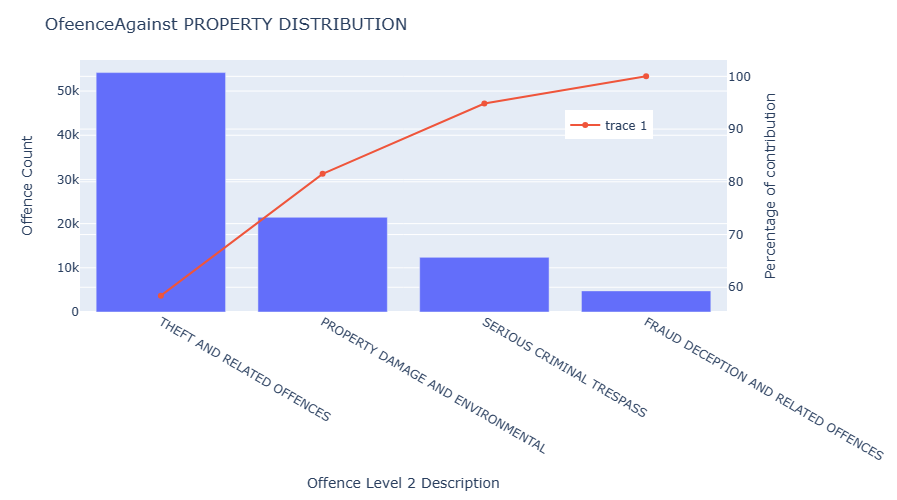

In [101]:
# OL2 cum contributuon in OL1_PERSON
filter = data["Offence Level 2 Description"].isin( OL2_of_OL1_PROPERTY)
cols = ["Offence Level 1 Description" , "Offence Level 2 Description" , "Offence count"]
ol2_PROPERTY = data.loc[filter ,cols ].groupby( by =cols[1] )[[cols[2]]].sum()
ol2_PROPERTY=ol2_PROPERTY.sort_values(by  =cols[2] , ascending=False )
ol2_PROPERTY

contribution = np.cumsum(100*ol2_PROPERTY["Offence count"]/np.sum(ol2_PROPERTY["Offence count"]))


fig = px.bar(data_frame =ol2_PROPERTY, x=ol2_PROPERTY.index, y="Offence count",
             # color=px.Constant("This year"),
             labels={'y': 'Left Axis'},
             width = 800,
             height=500)
fig.add_scatter( x=ol2_PROPERTY.index, y=contribution ,yaxis = 'y2'  )
fig.update_layout(
    title= "OfeenceAgainst PROPERTY DISTRIBUTION",
    yaxis=dict(title='Offence Count' , side = 'left'),
    yaxis2=dict( title =  'Percentage of contribution', overlaying='y', side='right'),
    legend=dict(x=0.75, y=0.80)
)
fig.show()

INSIGTH
- 'THEFT AND RELATED OFFENCES' and 'PROPERTY DAMAGE AND ENVIRONMENTAL' are responsible for more than **80 %** of the offence against Property. 

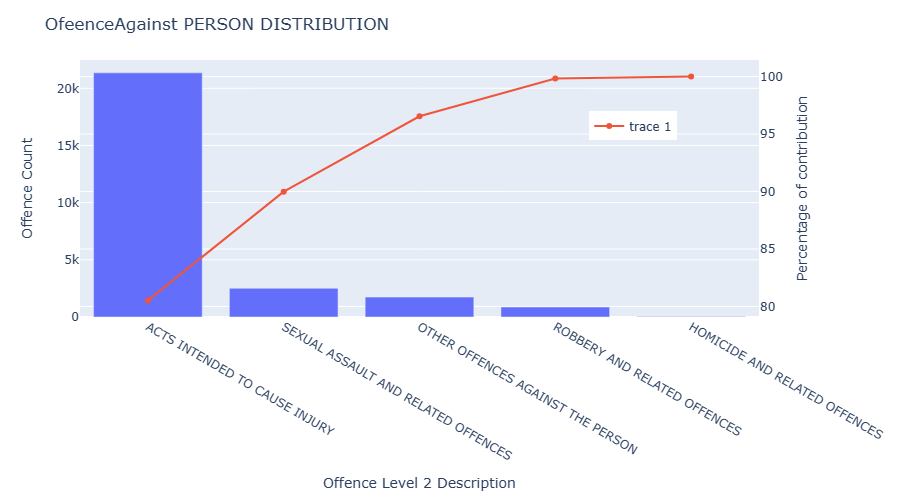

In [30]:
# OL2 cum contributuon in OL1_PERSON
# OL2 cum contributuon in OL1_PERSON
filter = data["Offence Level 2 Description"].isin( OL2_of_OL1_PERSON)
cols = ["Offence Level 1 Description" , "Offence Level 2 Description" , "Offence count"]
ol2_PERSON = data.loc[filter ,cols ].groupby( by =cols[1] )[[cols[2]]].sum()
ol2_PERSON=ol2_PERSON.sort_values(by  =cols[2] , ascending=False )
ol2_PROPERTY

contribution = np.cumsum(100*ol2_PERSON["Offence count"]/np.sum(ol2_PERSON["Offence count"]))


fig = px.bar(data_frame =ol2_PERSON, x=ol2_PERSON.index, y="Offence count",
             # color=px.Constant("This year"),
             labels={'y': 'Left Axis'},
             width = 800,
             height=500)
fig.add_scatter( x=ol2_PERSON.index, y=contribution ,yaxis = 'y2'  )
fig.update_layout(
    title= "OfeenceAgainst PERSON DISTRIBUTION",
    yaxis=dict(title='Offence Count' , side = 'left'),
    yaxis2=dict( title =  'Percentage of contribution', overlaying='y', side='right'),
    legend=dict(x=0.75, y=0.80)
)
fig.show()

INSIGTH
- "ACTS INTENDED TO CAUSE INJURY" is responsible for nearly  **80 %** of offence against person.

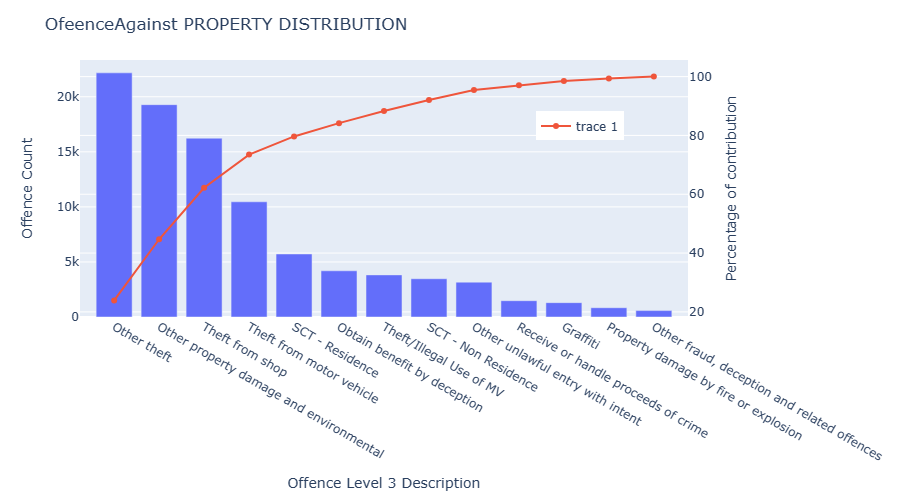

In [102]:
filter = data["Offence Level 3 Description"].isin( OL3_of_OL1_PROPERTY)
cols = ["Offence Level 1 Description" , "Offence Level 3 Description" , "Offence count"]
ol3_PROPERTY = data.loc[filter ,cols ].groupby( by =cols[1] )[[cols[2]]].sum()
ol3_PROPERTY=ol3_PROPERTY.sort_values(by  =cols[2] , ascending=False )
ol3_PROPERTY

contribution = np.cumsum(100*ol3_PROPERTY["Offence count"]/np.sum(ol3_PROPERTY["Offence count"]))


fig = px.bar(data_frame =ol3_PROPERTY, x=ol3_PROPERTY.index, y="Offence count",
             # color=px.Constant("This year"),
             labels={'y': 'Left Axis'},
             width = 800,
             height=500)
fig.add_scatter( x=ol3_PROPERTY.index, y=contribution ,yaxis = 'y2'  )
fig.update_layout(
    title= "OfeenceAgainst PROPERTY DISTRIBUTION",
    yaxis=dict(title='Offence Count' , side = 'left'),
    yaxis2=dict( title =  'Percentage of contribution', overlaying='y', side='right'),
    legend=dict(x=0.75, y=0.80)
)
fig.show()

INSIGHT
offences that are **80 %** of total offence against property are 
1) Other theft	22173
2) Other property damage and environmental	19283
3) Theft from shop	16238
4) Theft from motor vehicle	10463
5) SCT - Residence	5724

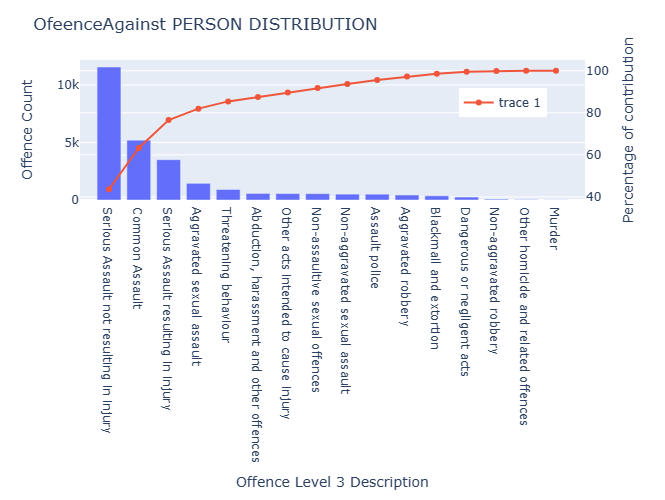

In [104]:
filter = data["Offence Level 3 Description"].isin( OL3_of_OL1_PERSON)
cols = ["Offence Level 1 Description" , "Offence Level 3 Description" , "Offence count"]
ol3_PERSON = data.loc[filter ,cols ].groupby( by =cols[1] )[[cols[2]]].sum()
ol3_PERSON=ol3_PERSON.sort_values(by  =cols[2] , ascending=False )
ol3_PERSON

contribution = np.cumsum(100*ol3_PERSON["Offence count"]/np.sum(ol3_PERSON["Offence count"]))


fig = px.bar(data_frame =ol3_PERSON, x=ol3_PERSON.index, y="Offence count",
             # color=px.Constant("This year"),
             labels={'y': 'Left Axis'},
             width = 800,
             height=500)
fig.add_scatter( x=ol3_PERSON.index, y=contribution ,yaxis = 'y2'  )
fig.update_layout(
    title= "OfeenceAgainst PERSON DISTRIBUTION",
    yaxis=dict(title='Offence Count' , side = 'left'),
    yaxis2=dict( title =  'Percentage of contribution', overlaying='y', side='right'),
    legend=dict(x=0.75, y=0.80)
)
fig.show()

INSIGHT:-
offences that are **80 %** of total offence against PERSON are
1) Serious Assault not resulting in injury	11571
2) Common Assault	5209
3) Serious Assault resulting in injury	3509
4) Aggravated sexual assault	1449
5) Threatening behaviour	914

We will now Analyse TOP 5 and Least 5 Offences of level 3 which are Against
1) PROPERY
2) PERSON
3) Both of them

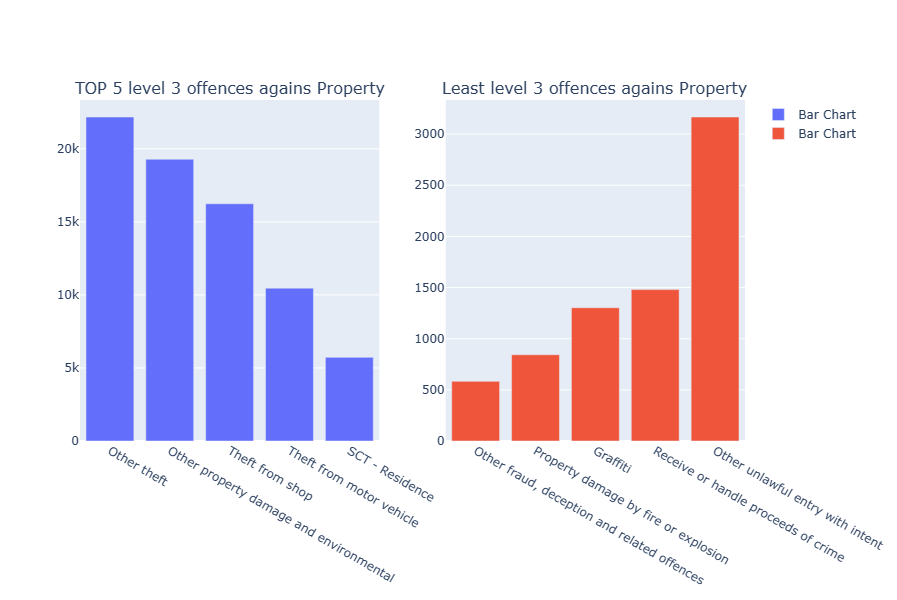

In [105]:
# For Crimes Agains Property

TOP = ol3_PROPERTY.sort_values(by ="Offence count",ascending=False)[:5]
least =ol3_PROPERTY.sort_values(by ="Offence count",ascending=True)[:5]
# Create subplots with one row and two columns
fig = sp.make_subplots(rows=1, cols=2,
                       subplot_titles=['TOP 5 level 3 offences agains Property', 'Least level 3 offences agains Property'],
                      row_heights =[2],
                      column_widths=[1,1])
fig.add_bar(x=TOP.index, y=TOP["Offence count"], name='Bar Chart', row=1, col=1)
fig.add_bar(x=least.index, y=least["Offence count"], name='Bar Chart', row=1, col=2)
fig.update_layout(
    height=600,  # Adjust the height
    width=1000,  # Adjust the width
)
fig.show()

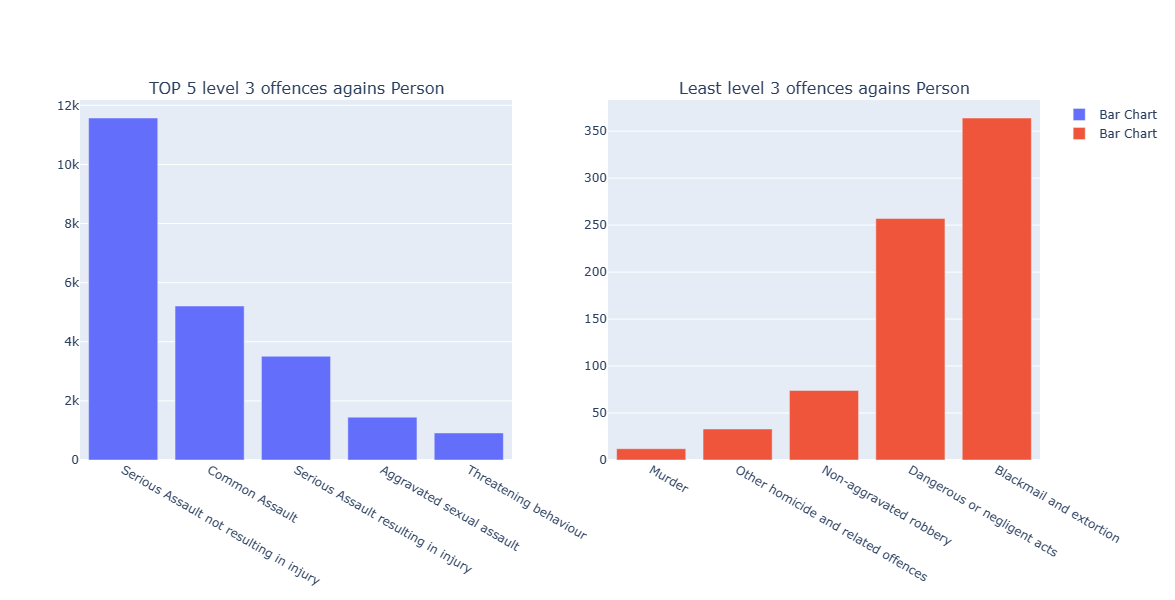

In [270]:
# For Crimes Agains Person

TOP = ol3_PERSON.sort_values(by ="Offence count",ascending=False)[:5]
least =ol3_PERSON.sort_values(by ="Offence count",ascending=True)[:5]
# Create subplots with one row and two columns
fig = sp.make_subplots(rows=1, cols=2,
                       subplot_titles=['TOP 5 level 3 offences agains Person', 'Least level 3 offences agains Person'],
                      row_heights =[2],
                      column_widths=[1,1])
fig.add_bar(x=TOP.index, y=TOP["Offence count"], name='Bar Chart', row=1, col=1)
fig.add_bar(x=least.index, y=least["Offence count"], name='Bar Chart', row=1, col=2)
fig.update_layout(
    height=600,  # Adjust the height
    width=1000,  # Adjust the width
)
fig.show()

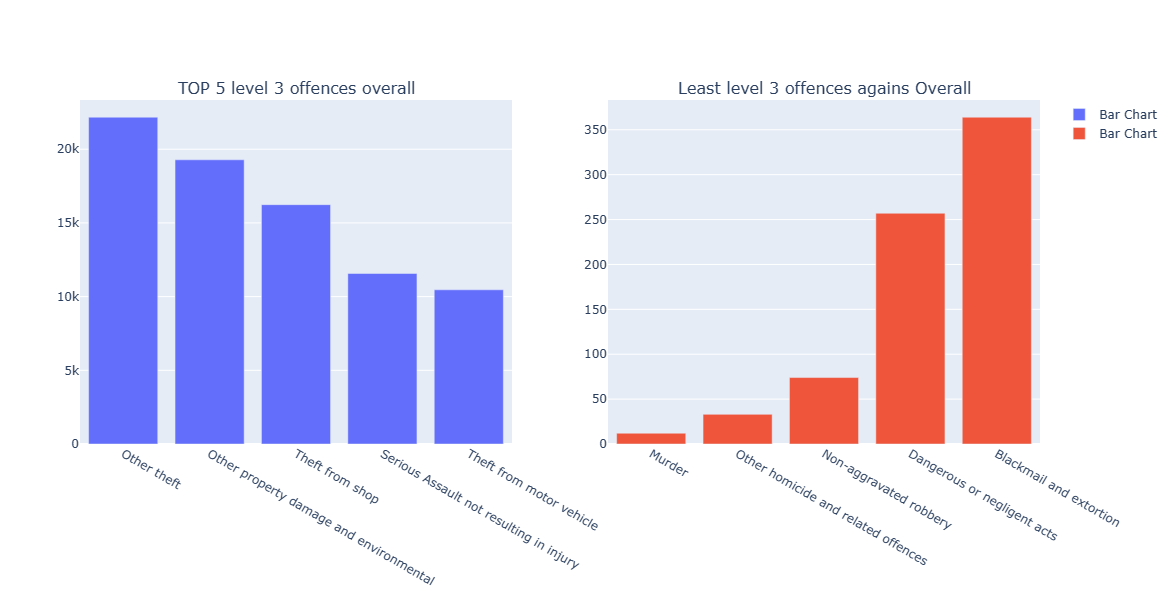

In [272]:
# For Crimes Overall
cols = ["Offence Level 1 Description" , "Offence Level 3 Description" , "Offence count"]
overall = data.groupby( by =cols[1] )[[cols[2]]].sum()
overall=overall.sort_values(by  =cols[2] , ascending=False )
overall
TOP = overall.sort_values(by ="Offence count",ascending=False)[:5]
least =overall.sort_values(by ="Offence count",ascending=True)[:5]
# Create subplots with one row and two columns
fig = sp.make_subplots(rows=1, cols=2,
                       subplot_titles=['TOP 5 level 3 offences overall', 'Least level 3 offences agains Overall'],
                      row_heights =[2],
                      column_widths=[1,1])
fig.add_bar(x=TOP.index, y=TOP["Offence count"], name='Bar Chart', row=1, col=1)
fig.add_bar(x=least.index, y=least["Offence count"], name='Bar Chart', row=1, col=2)
fig.update_layout(
    height=600,  # Adjust the height
    width=1000,  # Adjust the width
)
fig.show()

## Offence count on weekday

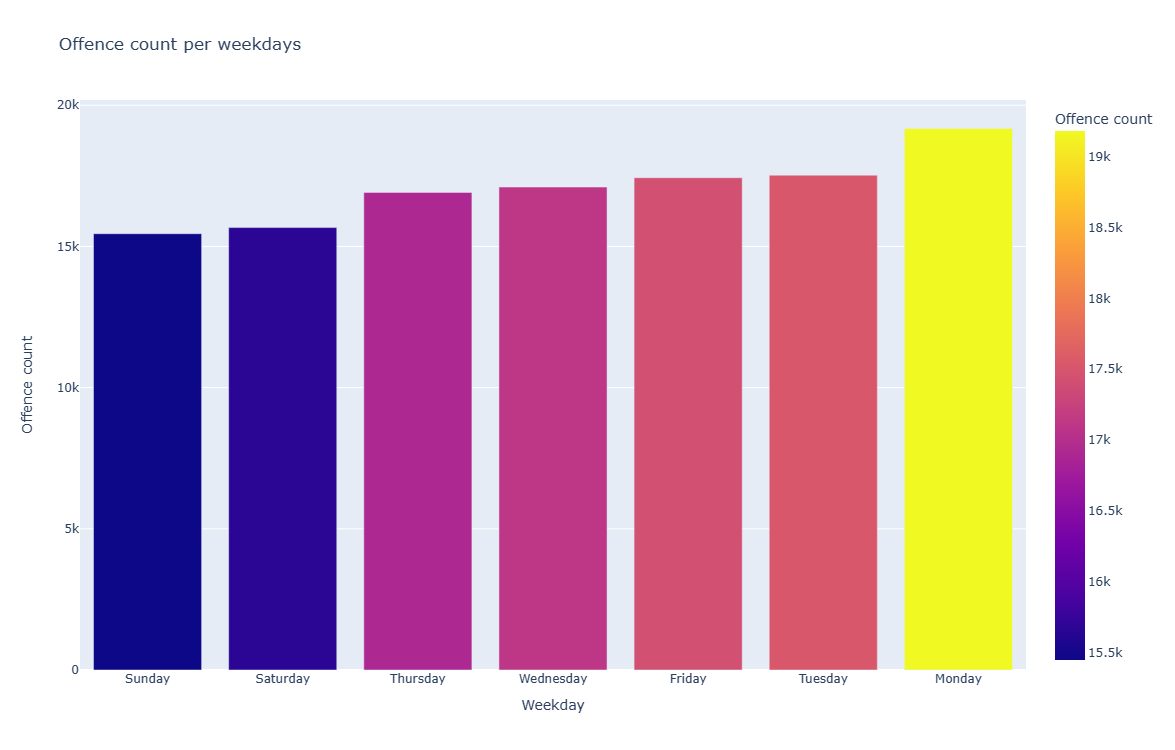

In [108]:
# Overall
WeekDayOffence = data.groupby(by =["Weekday"])[["Offence count"]].sum().sort_values(by="Offence count")
fig = px.bar(WeekDayOffence, x = WeekDayOffence.index,y="Offence count", title='Offence count per weekdays',
             color = WeekDayOffence["Offence count"],
            width=900,
            height=750)
fig.show()

- Overall most offneces are regestered on MONDAY and least offence recorded day is SUNDAY

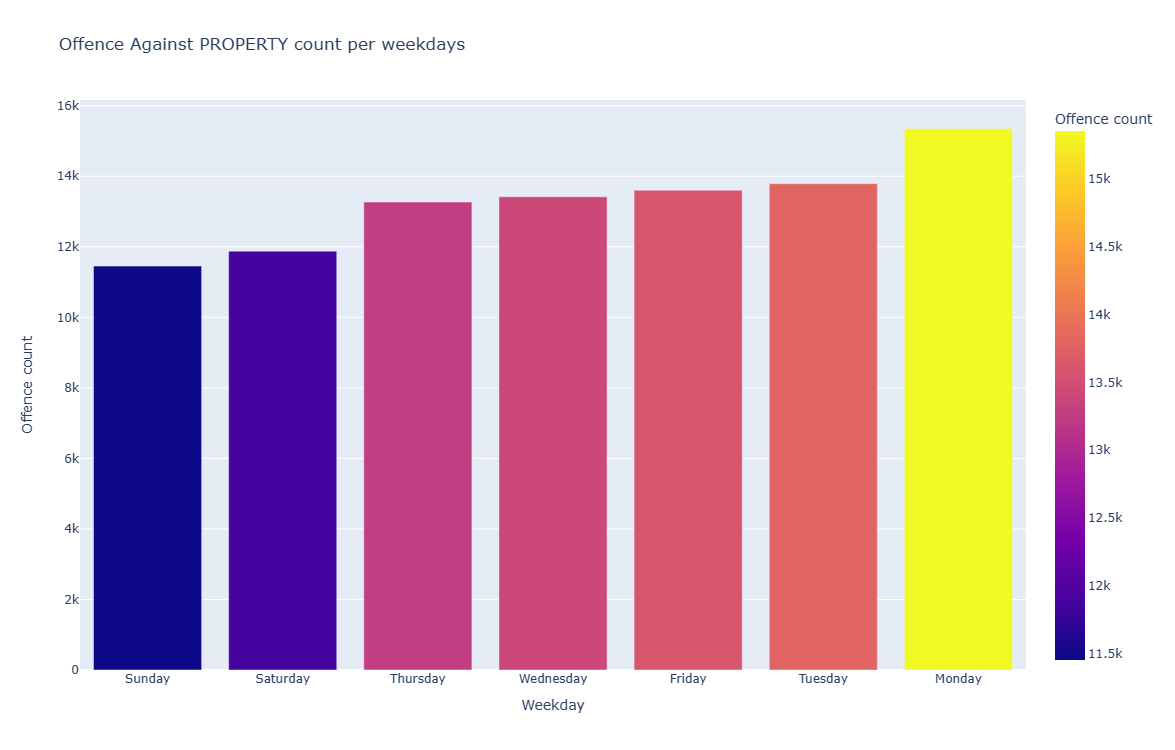

In [109]:
# Against Property

WeekDayOffencePROPERTY = data.loc[filter_for_OL1_PROPERTY,:].groupby(by =["Weekday"])[["Offence count"]].sum().sort_values(by="Offence count")
fig = px.bar(WeekDayOffencePROPERTY, x = WeekDayOffencePROPERTY.index,y="Offence count", title='Offence Against PROPERTY count per weekdays',
             color = WeekDayOffencePROPERTY["Offence count"],
            width=900,
            height=750)
fig.show()

- MOST offence against Property is redistered on MONDAY and least registered on sunday

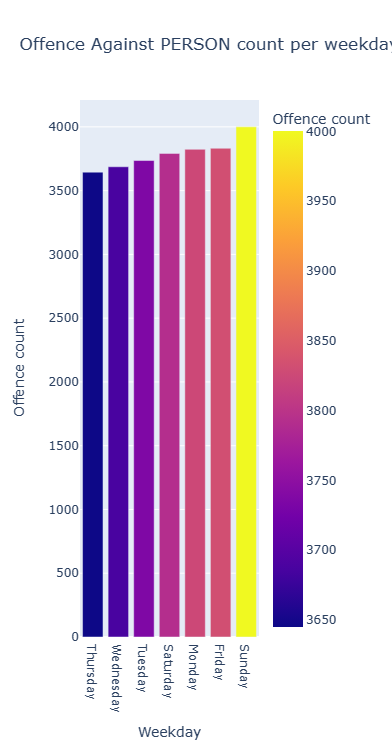

In [113]:
# Against Person
WeekDayOffencePERSON = data.loc[filter_for_OL1_PERSON,:].groupby(by =["Weekday"])[["Offence count"]].sum().sort_values(by="Offence count")
fig = px.bar(WeekDayOffencePERSON, x = WeekDayOffencePERSON.index,y="Offence count", title='Offence Against PERSON count per weekdays',
             color = WeekDayOffencePERSON["Offence count"],
            width=900,
            height=750)
fig.show()

- there is no specific pattern for offence against PERSON on WEEKDAY basis.

In [129]:
Data_for_map =data[data["Latitude"] != 0]
Data_for_map.shape

(95442, 11)

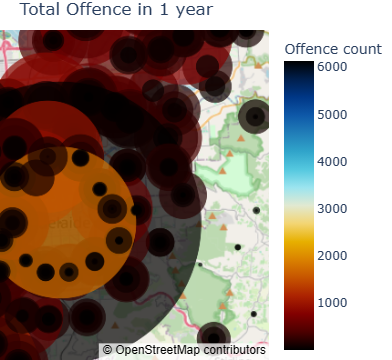

In [195]:
# visulize on map where OL1 occure and what is frequancy
cols =  ["Offence Level 1 Description" ,
         "Suburb - Incident",
         "Postcode - Incident" ,
         "Latitude",
         "Longitude",
        "Offence count"]
map_data = Data_for_map[cols].groupby(by =cols[:-1]).sum()
map_data = map_data.reset_index()

fig = px.scatter_mapbox(map_data,
                     lat="Latitude",
                     lon="Longitude",
                     color="Offence count",
                     hover_name="Suburb - Incident",
                        hover_data= ["Suburb - Incident" ,"Offence Level 1 Description" ],
                    color_continuous_scale=px.colors.cyclical.IceFire_r,
                     size="Offence count",
                        title = "Total Offence in 1 year",
                       size_max=200)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

# TOP 10 places with lowest and highest offence recorded overall

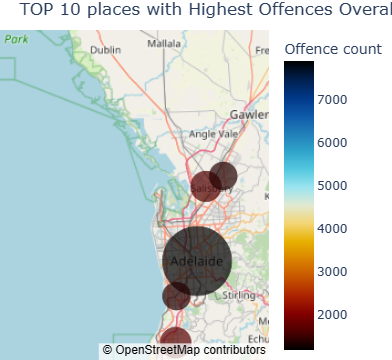

In [196]:
# TOP 10 Overall
cols =  ["Suburb - Incident",
         "Latitude",
         "Longitude",
        "Offence count"]
TOP10place = Data_for_map[cols].groupby(by = cols[:-1]).sum().sort_values(by ="Offence count" ,ascending=False )[:10]
TOP10place = TOP10place.reset_index()
fig = px.scatter_mapbox(TOP10place,
                     lat="Latitude",
                     lon="Longitude",
                     color="Offence count",
                     hover_name="Suburb - Incident",
                        hover_data= ["Suburb - Incident" ],
                    color_continuous_scale=px.colors.cyclical.IceFire_r,
                     size="Offence count",
                        title="TOP 10 places with Highest Offences Overall",
                       size_max=50)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

- TOP 10 places where overall offence registered in highest amount 

In [276]:
TOP10place.loc[: ,["Suburb - Incident" ,"Offence count"] ]

,Suburb - Incident,Offence count
0,ADELAIDE,7907
1,PORT AUGUSTA,2445
2,PORT LINCOLN,1890
3,MORPHETT VALE,1668
4,SALISBURY,1636
5,MURRAY BRIDGE,1623
6,MOUNT GAMBIER,1579
7,ELIZABETH,1374
8,OAKLANDS PARK,1368
9,WHYALLA STUART,1180


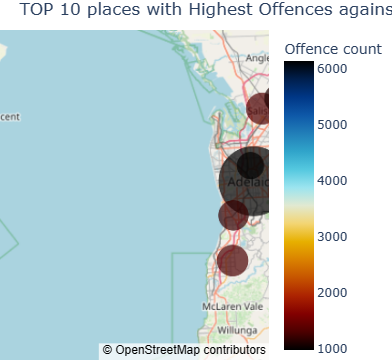

In [197]:
# TOP 10 Against Property
filter_for_map_Property = map_data["Offence Level 1 Description"] == "OFFENCES AGAINST PROPERTY"
Top_10_against_Property = map_data[filter_for_map_Property].sort_values(by = "Offence count" , ascending=False)[:10]

fig = px.scatter_mapbox(Top_10_against_Property,
                     lat="Latitude",
                     lon="Longitude",
                     color="Offence count",
                     hover_name="Suburb - Incident",
                        hover_data= ["Suburb - Incident" , "Offence Level 1 Description" ],
                        title="TOP 10 places with Highest Offences agains Property",
                    color_continuous_scale=px.colors.cyclical.IceFire_r,
                     size="Offence count",
                    
                       size_max=50)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

- TOP 10 places where offence aginst Property registered in highest amount

In [277]:
Top_10_against_Property.loc[: ,["Suburb - Incident" ,"Offence count"] ]


,Suburb - Incident,Offence count
1,ADELAIDE,6124
829,PORT AUGUSTA,1721
838,PORT LINCOLN,1461
908,SALISBURY,1323
646,MORPHETT VALE,1289
683,MURRAY BRIDGE,1211
742,OAKLANDS PARK,1202
657,MOUNT GAMBIER,1105
278,ELIZABETH,1099
854,PROSPECT,977


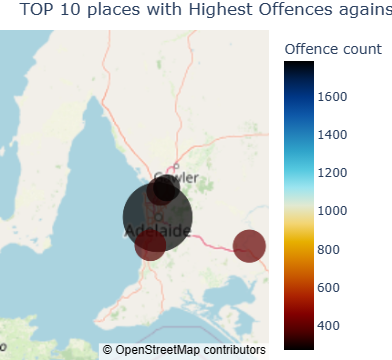

In [198]:
filter_for_map_Person = map_data["Offence Level 1 Description"] == "OFFENCES AGAINST THE PERSON"
Top_10_against_Person=map_data[filter_for_map_Person].sort_values(by = "Offence count" , ascending=False)[:10]
fig = px.scatter_mapbox(Top_10_against_Person,
                     lat="Latitude",
                     lon="Longitude",
                     color="Offence count",
                     hover_name="Suburb - Incident",
                        hover_data= ["Suburb - Incident" , "Offence Level 1 Description" ],
                    color_continuous_scale=px.colors.cyclical.IceFire_r,
                     size="Offence count",
                        title="TOP 10 places with Highest Offences agains Person",
                    
                       size_max=50)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":30,"l":0,"b":0})
fig.show()

- TOP 10 places where offence against person registered in highest amount

In [278]:
Top_10_against_Person.loc[: ,["Suburb - Incident" ,"Offence count"] ]


,Suburb - Incident,Offence count
1197,ADELAIDE,1783
1796,PORT AUGUSTA,724
1674,MOUNT GAMBIER,474
1802,PORT LINCOLN,429
1689,MURRAY BRIDGE,412
2015,WHYALLA STUART,391
1664,MORPHETT VALE,379
1862,SALISBURY,313
2013,WHYALLA NORRIE,289
1378,ELIZABETH,275


## Trends of offence over period of 1 year at various place

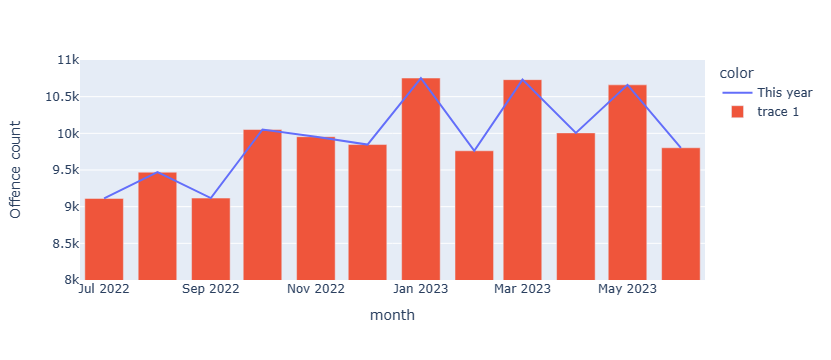

In [94]:
TimeSeries= data.groupby(by ="month")[["Offence count"]].sum()
# TimeSeries
fig = px.line(data_frame =TimeSeries, x=TimeSeries.index, y="Offence count", color=px.Constant("This year"),
              range_y =[8000 ,11000],
             labels=dict(x=TimeSeries.index, y="Offence count"))
fig.add_bar( x=TimeSeries.index, y=TimeSeries["Offence count"] )
fig.show()

- overall offence are increased in last one year and trend us upward

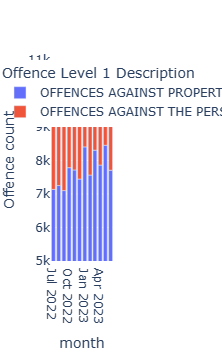

In [213]:
TimeSeries= data.groupby(by =["month" , "Offence Level 1 Description"])[["Offence count"]].sum()
TimeSeries = TimeSeries.reset_index()
fig = px.bar(data_frame =TimeSeries, x="month", y="Offence count", color="Offence Level 1 Description",
              range_y =[5000 ,11000],
             labels=dict(x=TimeSeries.index, y="Offence count"))
# fig.add_bar( x=TimeSeries.index, y=TimeSeries["Offence count"] )
fig.show()

- Below a DASH app is created
- it  shows trend of the offences in last one year based on whether it is against PROPERTY or PEOPLE for top 10 highest offence registered places

In [263]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px

# Sample DataFrame
data1 = {'Month': ['Jan', 'Jan', 'Feb', 'Feb', 'Mar', 'Mar'],
        'Category': ['a', 'b', 'a', 'b', 'a', 'b'],
        'Item': ['item1', 'item2', 'item1', 'item2', 'item1', 'item2'],
        'Value': [10, 15, 20, 25, 30, 35]}

df = pd.DataFrame(data1)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.Label('Select Offence against:'),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in data['Offence Level 1 Description'].unique()],
        value=data['Offence Level 1 Description'].unique()[0]
    ),
    
    html.Label('Select Suburb - Incident:'),
    dcc.Dropdown(
        id='item-dropdown',
        value='ADELAIDE',
        multi=False
    ),
    
    dcc.Graph(id='line-plot')
])

# Define the callback to update the item dropdown options based on selected category
@app.callback(
    Output('item-dropdown', 'options'),
    [Input('category-dropdown', 'value')]
)
def update_item_dropdown(selected_category):
    # Filter unique items based on selected category
    if selected_category == "OFFENCES AGAINST PROPERTY":
        items_for_category = Top_10_against_Property["Suburb - Incident"]
    else:
        items_for_category = Top_10_against_Person["Suburb - Incident"]
    
    # Create options for item dropdown
    options = [{'label': item, 'value': item} for item in items_for_category]
    
    return options

# Define the callback to update the line plot based on filter selections
@app.callback(
    Output('line-plot', 'figure'),
    [Input('category-dropdown', 'value'),
     Input('item-dropdown', 'value')]
)
def update_line_plot(selected_category, selected_item):
    # Filter DataFrame based on selected category and item
    filter = (data['Offence Level 1 Description'] == selected_category) & (data["Suburb - Incident"] == selected_item)
    filtered_df = data[filter]
    
    # Group by month and sum the 'Value' column
    grouped_df = filtered_df.groupby('month')['Offence count'].sum().reset_index()
    
    # Plot the line chart
    fig = px.line(grouped_df, x='month', y='Offence count', title=f'Offence trend in {selected_item} against {selected_category}')
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


INSIGTHS:
 - IN LAST 1 YEAR OFFENCES AGAINST PROPERTY IS "INCREASED" IN FOLLOWING PLACES
   - 1) ADELAIDE
     2) SALISBURY
     3) OAK LAND PARK
     4) PROSPECT
 - IN "MORPHETT VALE" OFFENCE AGAINST PROPERTY IS DECEASING SINCE START OF 2023
 - IN LAST 1 YEAR OFFENCES AGAINST PERSON IS "INCREASED" IN FOLLOWING PLACECS
 - 1) MOUNT GAMBIER 
